In [1]:
#데이터 불러기기
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/kc_house_data.csv")
print(df.head)
print(df.shape)

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

In [2]:
#결측치 확인
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
#히트맵 목적 데이터 수정
df["date"] = df["date"].str[:8].astype(int)
df["date"]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: int32

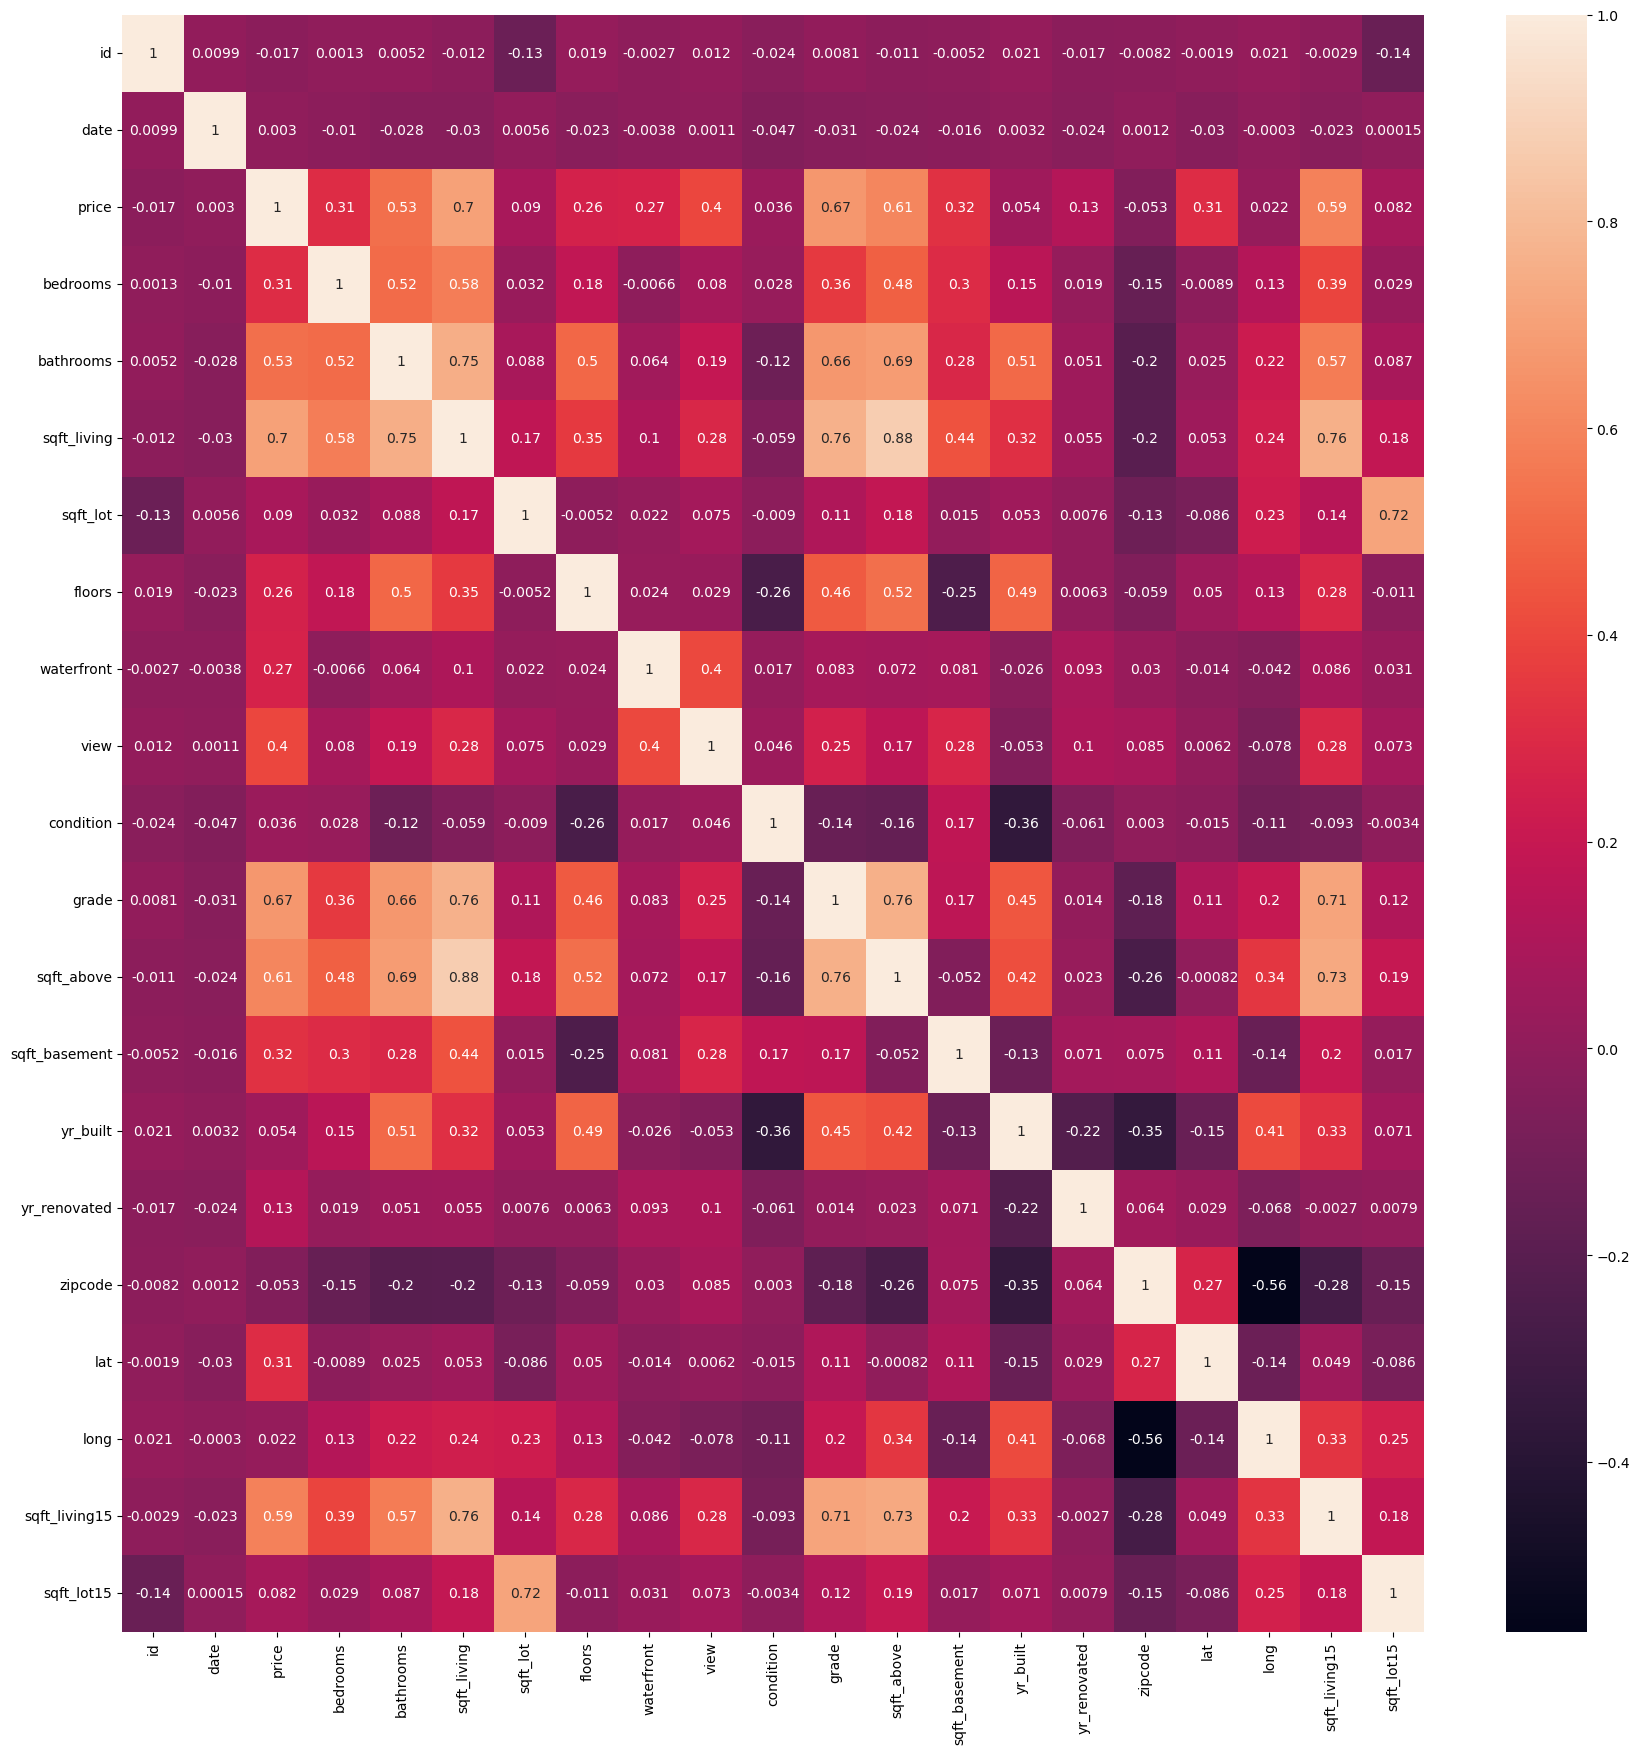

In [4]:
# 히트맵을 통한 상관관계 확인
import  seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True)
plt.show()

In [5]:
#상관관계 낮은 columns 제거 (상관계수 0.3 미만)
df=df.drop(["sqft_lot15","long","zipcode","yr_renovated","yr_built",
            "condition","waterfront","floors","sqft_lot","date","id"],axis=1)
df.shape

(21613, 10)

In [6]:
# 컬럼 중 원-핫 인코딩 필요 컬럼 확인 후 처리
print(df.head)
# 원-핫 인코딩 필요 x

<bound method NDFrame.head of           price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
0      221900.0         3       1.00         1180     0      7        1180   
1      538000.0         3       2.25         2570     0      7        2170   
2      180000.0         2       1.00          770     0      6         770   
3      604000.0         4       3.00         1960     0      7        1050   
4      510000.0         3       2.00         1680     0      8        1680   
...         ...       ...        ...          ...   ...    ...         ...   
21608  360000.0         3       2.50         1530     0      8        1530   
21609  400000.0         4       2.50         2310     0      8        2310   
21610  402101.0         2       0.75         1020     0      7        1020   
21611  400000.0         3       2.50         1600     0      8        1600   
21612  325000.0         2       0.75         1020     0      7        1020   

       sqft_basement      lat  sq

In [7]:
# 라벨, 특성 분리
x=df.drop("price",axis=1)
y=df["price"]
print(x.shape,y.shape)

(21613, 9) (21613,)


In [8]:
# csv → array
import numpy as np
x=x.to_numpy()
y=y.to_numpy()

In [9]:
#target
#train_test 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(16209, 9) (5404, 9)
(16209,) (5404,)


In [10]:
# 스케일링
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train_scaled = x_scaler.fit_transform(x_train)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1))


x_test_scaled = x_scaler.transform(x_test)
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1))

In [21]:
#하이퍼 파라미터 튜닝
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(9,input_shape=(9,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\김찬희\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,196 (8.58 KB)

 Trainable params: 2,196 (8.58 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# 딥러닝 학습, 예측
history=model.fit(x=x_train_scaled, y=y_train_scaled, epochs=10,validation_data= (x_test_scaled,y_test_scaled))
y_pred=model.predict(x_test_scaled)

Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2048 - mse: 0.2048 - val_loss: 0.2798 - val_mse: 0.2798
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2187 - mse: 0.2187 - val_loss: 0.2812 - val_mse: 0.2812
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2099 - mse: 0.2099 - val_loss: 0.3200 - val_mse: 0.3200
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2094 - mse: 0.2094 - val_loss: 0.2736 - val_mse: 0.2736
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2079 - mse: 0.2079 - val_loss: 0.2967 - val_mse: 0.2967
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1971 - mse: 0.1971 - val_loss: 0.2743 - val_mse: 0.2743
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1971 - mse: 0.1971 - val_loss: 0.2718 - val_mse: 0.2718
Epoch 8/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2051 - mse: 0.2051 - val_loss: 0.2750 - val_mse: 0.2750
Epoch 9/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [26]:
# 예측값 역 스케일링 후 성능평가 mse
from sklearn.metrics import mean_squared_error
print("mse:",mean_squared_error(y_test_scaled,y_pred))

mse: 0.26707266861282375
